# 9. Draw figures 1 and 2
**Inputs**:  

+ Project pickle file `independent_contrasts/18S_tree_reprophylo_project_with_TE_style_and_RNAi`
+ Superfamiles counts pickle file `TE_counts/family_counts.pkl`. The info exists in the `Project` and can be resummarized, but easier to use this perexisiting summary

**Outputs**:

+ Figure 1: `TE_counts/class_counts_tree.png`
+ Figure 2:
    + `TE_counts/no_counts_tree.png`
    + `TE_counts/bar_chart_dna_families.png`
    + `TE_counts/bar_chart_ltr_families.png`
    + `TE_counts/bar_chart_line_families.png`
    + `TE_counts/bar_chart_sine_families.png`

**Strategy**: Use extended options from ete rather than the built in ReproPhylo function for the tree. Use matplotlib for the barplots. Compose together the bits of figure 2 in libre-office.

## 9.1 Validate branch lengths same between full and trimmed tree

DEBUG:Cloud:Log file (/root/.picloud/cloud.log) opened


returning tree object 18S@SINA@gappyout@dna_cat_gtr


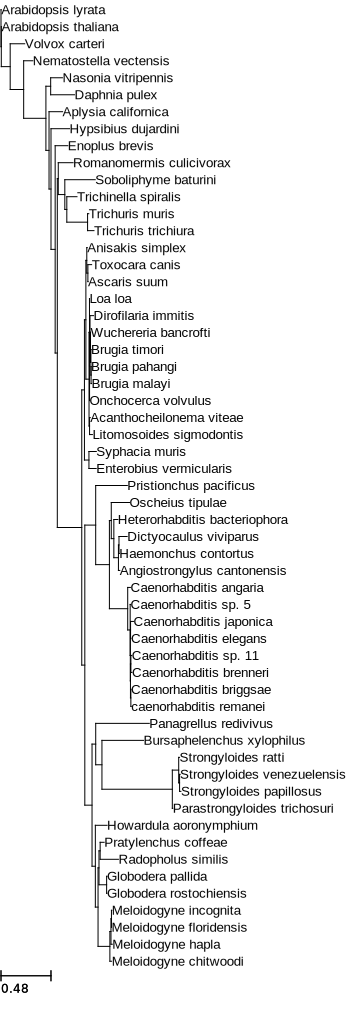

In [1]:
from reprophylo import *

pj = unpickle_pj('independent_contrasts/18S_tree_reprophylo_project_with_TE_style_and_RNAi', git=False)

pj.trees.keys()
t = pj.ft('18S@SINA@gappyout@dna_cat_gtr')
t.set_outgroup(t.search_nodes(source_organism='Arabidopsis lyrata')[0])
t.dist=0
for n in t:
    n.name = n.source_organism
ns=NodeStyle()
ns['size'] = 0
for n in t.traverse():
    n.set_style(ns)
t.render('%%inline')

returning tree object 18S@SINA@gappyout@fd_b_fb_50ML


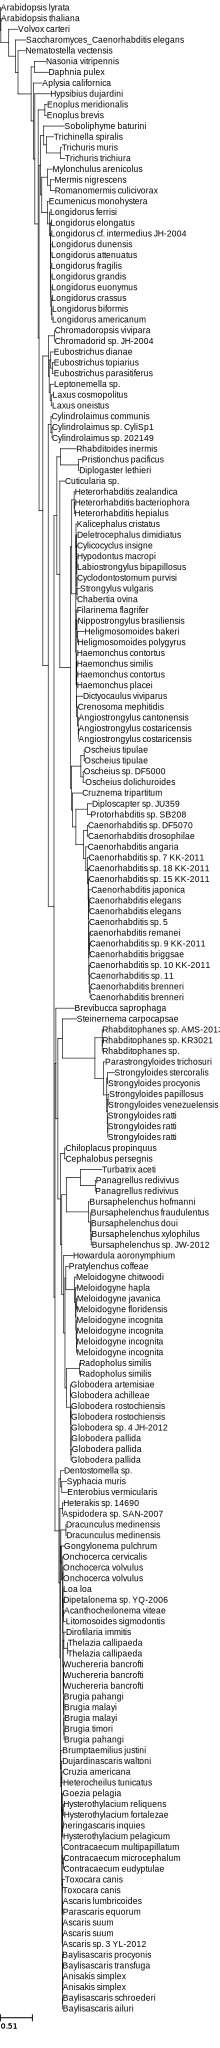

In [2]:
t = pj.ft('18S@SINA@gappyout@fd_b_fb_50ML')
for n in t:
    n.name = n.source_organism
ns=NodeStyle()
ns['size'] = 0
for n in t.traverse():
    n.set_style(ns)
t.set_outgroup(t.search_nodes(source_organism='Arabidopsis lyrata')[0])
t.dist=0
t.render('%%inline')

## 9.2 Remove leaf of species with unpublished genomes

In [1]:
from reprophylo import *

# Load the Project with TE and RNAi data
pj = unpickle_pj('independent_contrasts/18S_tree_reprophylo_project_with_TE_style_and_RNAi', git=False)

# Ensure the metadata is on the trees
pj.propagate_metadata()

# Make a copy of the phylobayes Tree object
Bayes = pj.ft('18S@SINA@gappyout@dna_cat_gtr')

[Acan, Asim, Bpah, Btim, Ever, Sbat, Tcan] = [Bayes.search_nodes(keep=i)[0] for i in
                                            ['Acan', 'Asim', 'Bpah', 'Btim', 'Ever', 'Sbat', 'Tcan']]
for n in [Acan, Asim, Bpah, Btim, Ever, Sbat, Tcan]:
    n.delete()

DEBUG:Cloud:Log file (/root/.picloud/cloud.log) opened


returning tree object 18S@SINA@gappyout@dna_cat_gtr


## 9.3 Draw Figure 1

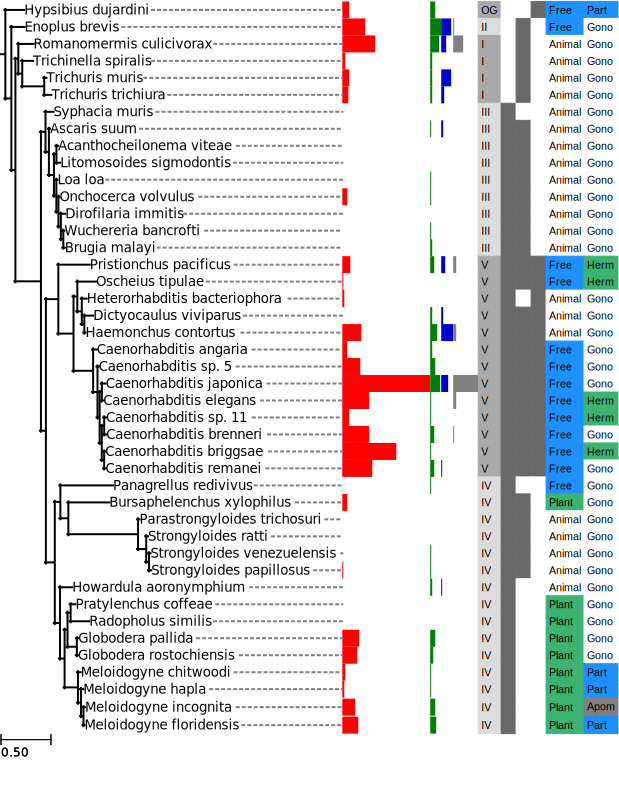

In [2]:
# Get nodes we'll want to refer to later
alyr = Bayes.search_nodes(keep='Alyr')[0]
vcar = Bayes.search_nodes(keep='Vcar')[0]
hduj = Bayes.search_nodes(keep='Hduj')[0]

# Ladderize the tree
Bayes.set_outgroup(hduj)
R = Bayes.get_common_ancestor(alyr,vcar)
Bayes.dist = 0
Bayes.set_outgroup(R)
for n in Bayes.traverse():
    if not n.is_leaf():
        n.ladderize(0)
        
# Set the tree style and a default node style
ts = TreeStyle()
ns = NodeStyle()
ns['size'] = 0
ns['hz_line_width'] = 2
ns['vt_line_width'] = 2
ts.show_leaf_name = False
ts.scale = 100
ts.branch_vertical_margin = 0
ts.legend_position=1

# Put binomials as leaf labels
for n in Bayes.traverse():
    n.set_style(ns)
    if n.is_leaf():
        hola = TextFace(n.source_organism.replace('caenorhabditis','Caenorhabditis'), fsize=10.5)
        hola.margin_right=2
        n.add_face(hola,0,position='branch-right')

# Call some nodes we'll want to refer to
hduj = Bayes.search_nodes(keep='Hduj')[0]
cele = Bayes.search_nodes(keep='Cele')[0]

# Distribute the outgroup branch length 
mcra = Bayes.get_common_ancestor(hduj,cele)
root_length = R.dist + mcra.dist
R.dist = root_length * 0.6
mcra.dist = root_length * 0.4
Bayes = mcra.detach()

# Path to bar images
c_path = 'TE_counts/colors/'

# Assign image and scale to each TE class
colors = [['DNA', 'Red',0.001],
          ['LTR', 'Green',0.001],
          ['LINE', 'Blue',0.001],
          ['SINE', 'Gray',0.01]]

# Assign label and colour to each character state
trait_states = {'M4A': ['Gono', 'White'],
                'M4B': ['Herm','MediumSeaGreen'],
                'M4C': ['Part','DodgerBlue'],
                'M4D': ['Apom','gray'],
                'P3A': ['Animal', 'white'],
                'P3B': ['Plant','MediumSeaGreen'],
                'P3C': ['Free','DodgerBlue'],
                'piwi0': ['PIWI','white'],
                'piwi1': ['PIWI','DimGray'],
                'rrf10': ['RRF1','white'],
                'rrf11': ['RRF1','DimGray'],
                'rrf30': ['RRF3','white'],
                'rrf31': ['RRF3','DimGray'],
                'cladeI': ['I','DarkGray'],
                'cladeII': ['II','Gainsboro'],
                'cladeIII': ['III','Gainsboro'],
                'cladeIV': ['IV','Gainsboro'],
                'cladeV': ['V','DarkGray'],
                'cladeO': ['OG','DarkGray']
                }


# Put TE count bars on the tree   
j=1
for e,c,s in colors:
    for l in Bayes:
        if e in l.__dict__.keys():
            l.add_face(ImgFace('%s/%s.png'%(c_path,c), 
                               width=int(get_qualifiers_dictionary(pj, l.feature_id)[e])*s,
                               height=17),
                       j, position='aligned')
            
    j += 1

    
# Add metadata labels    
for trait in ['clade','rrf1','rrf3','piwi','P3','M4']:
    for l in Bayes:
        if trait in l.__dict__.keys():
            value = str(get_qualifiers_dictionary(pj, l.feature_id)[trait])
            label = trait_states[trait+value][0]
            color = 'black'
            if trait+value in ['piwi0', 'rrf10', 'rrf30']:
                color = 'white'
                label = '   '
            elif trait+value in ['piwi1', 'rrf11', 'rrf31']:
                color = 'green'
                label = '   '
            face = TextFace(' '+label+' ',
                                fsize=8, ftype='arial',
                                fgcolor=color, tight_text=True)
            face.background.color = trait_states[trait+value][1]
            face.margin_top = 4.5
            face.margin_bottom = 4.5
            l.add_face(face,
                       j, position='aligned')
    j += 1
    
Bayes.render('%%inline',tree_style=ts) 

In [3]:
# Write the figure to a file
faces = Bayes.render('TE_counts/class_counts_tree_no_wtsi.png',tree_style=ts, w=2000, dpi=900) 

## 9.4 Draw the tree from Figure 2

returning tree object 18S@SINA@gappyout@dna_cat_gtr


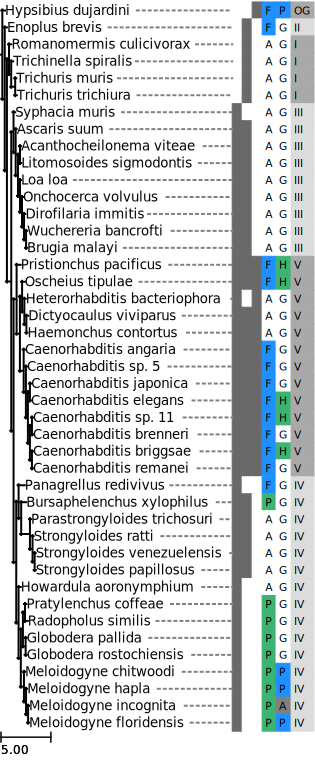

In [4]:
Bayes = pj.ft('18S@SINA@gappyout@dna_cat_gtr')

[Acan, Asim, Bpah, Btim, Ever, Sbat, Tcan] = [Bayes.search_nodes(keep=i)[0] for i in
                                            ['Acan', 'Asim', 'Bpah', 'Btim', 'Ever', 'Sbat', 'Tcan']]
for n in [Acan, Asim, Bpah, Btim, Ever, Sbat, Tcan]:
    n.delete()
    
alyr = Bayes.search_nodes(keep='Alyr')[0]
vcar = Bayes.search_nodes(keep='Vcar')[0]
hduj = Bayes.search_nodes(keep='Hduj')[0]
Bayes.set_outgroup(hduj)
R = Bayes.get_common_ancestor(alyr,vcar)
Bayes.dist = 0
Bayes.set_outgroup(R)
for n in Bayes.traverse():
    if not n.is_leaf():
        n.ladderize(0)
#Bayes.ladderize(1)

ts = TreeStyle()
ns = NodeStyle()
ns['size'] = 0
ns['hz_line_width'] = 2
ns['vt_line_width'] = 2
ts.show_leaf_name = False
ts.scale = 10
ts.legend_position=1
for n in Bayes.traverse():
    n.set_style(ns)
    if n.is_leaf():
        hola = TextFace(n.source_organism.replace('caenorhabditis','Caenorhabditis'))
        hola.margin_right=6
        n.add_face(hola,0,position='branch-right')

hduj = Bayes.search_nodes(keep='Hduj')[0]
cele = Bayes.search_nodes(keep='Cele')[0]
mcra = Bayes.get_common_ancestor(hduj,cele)
root_length = R.dist + mcra.dist
R.dist = root_length * 0.6
mcra.dist = root_length * 0.4
Bayes = mcra.detach()

trait_states = {'M4A': ['G', 'White'],
                'M4B': ['H','MediumSeaGreen'],
                'M4C': ['P','DodgerBlue'],
                'M4D': ['A','gray'],
                'P3A': ['A', 'white'],
                'P3B': ['P','MediumSeaGreen'],
                'P3C': ['F','DodgerBlue'],
                'piwi0': [' ','white'],
                'piwi1': [' ','DimGray'],
                'rrf10': [' ','white'],
                'rrf11': [' ','DimGray'],
                'rrf30': [' ','white'],
                'rrf31': [' ','DimGray'],
                'cladeI': ['I','DarkGray'],
                'cladeII': ['II','Gainsboro'],
                'cladeIII': ['III','Gainsboro'],
                'cladeIV': ['IV','Gainsboro'],
                'cladeV': ['V','DarkGray'],
                'cladeO': ['OG','DarkGray']
                }




    
j=1

    
    
for trait in ['rrf1','rrf3','piwi','P3','M4','clade']:
    for l in Bayes:
        if trait in l.__dict__.keys():
            value = str(get_qualifiers_dictionary(pj, l.feature_id)[trait])
            label = trait_states[trait+value][0]
            face = TextFace(' '+trait_states[trait+value][0]+' ',
                                fsize=8, #ftype='Courier',
                                fgcolor='black', tight_text=True)
            face.background.color = trait_states[trait+value][1]
            face.margin_top = 4.5
            face.margin_bottom = 4.5
            l.add_face(face,
                       j, position='aligned')
    j += 1
#ts.legend.add_face(TextFace('The scale for SINE elements 100-fold larger '),0)
Bayes.render('%%inline',tree_style=ts) 

In [5]:
faces = Bayes.render('TE_counts/no_counts_tree_no_wtsi.png',tree_style=ts, w=2000, dpi=900) 

## 9.5 Darw barplots from Figure 2

### Sort superfamilies alphabetically and by calss

In [37]:
# Read the superfamily counts from file

import cloud.serialization.cloudpickle as pickle

pickle_handle = open('TE_counts/family_counts.pkl', 'rb')
familiy_counts = pickle.pickle.load(pickle_handle)


# Make sorted superfamily lists for every class
from itertools import chain

dna_families = sorted([i for i in set(chain(*[familiy_counts[key].keys() for key in familiy_counts.keys()])) 
                       if 'DNA' in i])
ltr_families = sorted([i for i in set(chain(*[familiy_counts[key].keys() for key in familiy_counts.keys()])) 
                       if 'LTR' in i], reverse=True)
line_families = sorted([i for i in set(chain(*[familiy_counts[key].keys() for key in familiy_counts.keys()])) 
                       if 'LINE' in i], reverse=True)
sine_families = sorted([i for i in set(chain(*[familiy_counts[key].keys() for key in familiy_counts.keys()])) 
                       if ('SINE' in i and not '?' in i)], reverse=True)

to_draw = [[dna_families,'dna'],
           [ltr_families,'ltr'],
           [line_families,'line'],
           [sine_families,'sine']]

### Darw the bar charts

In [38]:
from itertools import chain
from random import shuffle

for te_class in to_draw:

    fam_elements_counts = []
    
    sps = []
    
    # Get the species names that made it into the figure
    for l in Bayes:
        if 'keep' in l.__dict__.keys() and 'DNA' in l.__dict__.keys():
            sps.append(l.keep)
            
    # Calculate the total count in each species for this TE class
    totals = {}
    for sp in sps:
        totals[sp] = sum([familiy_counts[sp][f] for f in te_class[0] if f in familiy_counts[sp]])
        
    # Make a list of lists with a percents list for each species    
    for f in te_class[0]:
        elements_list = []
        for sp in sps:
            if f in familiy_counts[sp].keys():
                elements_list.append(familiy_counts[sp][f]*100/float(totals[sp]))
            else:
                elements_list.append(0)
        fam_elements_counts.append(elements_list)
    
    # Define colour scheme
    c={'dna': plt.cm.Set1(np.linspace(0, 1, len(fam_elements_counts))),
       'ltr': plt.cm.Set1(np.linspace(0, 1, len(fam_elements_counts))),
       'line':plt.cm.Set1(np.linspace(0, 1, len(fam_elements_counts))),
       'sine':plt.cm.Set1(np.linspace(0, 1, len(fam_elements_counts)))}  

    colors = c[te_class[1]]
        
    import numpy as np
    import matplotlib.pyplot as plt
        
    # Draw the figure
    N = len(sps)
    
    # The x axis locations for the groups
    ind = np.arange(N)    
    
    # The width of the bars: can also be len(x) sequence
    width = 1       
    
    fig, ax = plt.subplots()
    
    # Make stacked bars amounting to 100% for each species
    bars = ax.bar(ind, fam_elements_counts[0], width, color=colors[0])
    b = fam_elements_counts[0]
    for br in bars:
        br.set_label(te_class[0][0].partition('/')[-1])
                     
    for i in range(1, len(fam_elements_counts)):
        
        counts = fam_elements_counts[i]
        bars = ax.bar(ind, counts, width, bottom=b, color=colors[i])
        for br in bars:
            br.set_label(te_class[0][i].partition('/')[-1])
        b = [b[i]+counts[i] for i in range(N)]
    
    # axes settings and formats
    plt.xticks(ind+width/2., sps,  rotation=90)
    plt.ylim([0,100])
    plt.xlim([0,len(sps)])
    handles, labels = ax.get_legend_handles_labels()
    ax.tick_params(labelsize=40)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    
    # Write the figure
    fig = plt.gcf()
    fig.set_size_inches(50,30)    
    fig.savefig('TE_counts/bar_chart_%s_families_no_wtsi.png'%te_class[1],bbox_inches='tight')
    plt.close('all')

## 9.6 S1 Figure

In [42]:
from itertools import chain
from random import shuffle

from reprophylo import *

# Load the Project with TE and RNAi data
pj = unpickle_pj('independent_contrasts/18S_tree_reprophylo_project_with_TE_style_and_RNAi', git=False)

# Ensure the metadata is on the trees
pj.propagate_metadata()

Bayes = pj.ft('18S@SINA@gappyout@dna_cat_gtr')

[Acan, Asim, Bpah, Btim, Ever, Sbat, Tcan] = [Bayes.search_nodes(keep=i)[0] for i in
                                            ['Acan', 'Asim', 'Bpah', 'Btim', 'Ever', 'Sbat', 'Tcan']]
for n in [Acan, Asim, Bpah, Btim, Ever, Sbat, Tcan]:
    n.delete()
    

alyr = Bayes.search_nodes(keep='Alyr')[0]
vcar = Bayes.search_nodes(keep='Vcar')[0]
hduj = Bayes.search_nodes(keep='Hduj')[0]
Bayes.set_outgroup(hduj)
R = Bayes.get_common_ancestor(alyr,vcar)
Bayes.dist = 0
Bayes.set_outgroup(R)
for n in Bayes.traverse():
    if not n.is_leaf():
        n.ladderize(0)

for te_class in to_draw:

    fam_elements_counts = []
    
    sps = []
    
    # Get the species names that made it into the figure
    for l in Bayes:
        if 'keep' in l.__dict__.keys() and 'DNA' in l.__dict__.keys():
            sps.append(l.keep)
            
    # Calculate the total count in each species for this TE class
    totals = {}
    for sp in sps:
        totals[sp] = sum([familiy_counts[sp][f] for f in te_class[0] if f in familiy_counts[sp]])
        
    # Make a list of lists with a percents list for each species    
    for f in te_class[0]:
        elements_list = []
        for sp in sps:
            if f in familiy_counts[sp].keys():
                elements_list.append(familiy_counts[sp][f])
            else:
                elements_list.append(0)
        fam_elements_counts.append(elements_list)
    
    # Define colour scheme
    c={'dna': plt.cm.Set1(np.linspace(0, 1, len(fam_elements_counts))),
       'ltr': plt.cm.Set1(np.linspace(0, 1, len(fam_elements_counts))),
       'line':plt.cm.Set1(np.linspace(0, 1, len(fam_elements_counts))),
       'sine':plt.cm.Set1(np.linspace(0, 1, len(fam_elements_counts)))}  

    colors = c[te_class[1]]
        
    import numpy as np
    import matplotlib.pyplot as plt
        
    # Draw the figure
    N = len(sps)
    
    # The x axis locations for the groups
    ind = np.arange(N)    
    
    # The width of the bars: can also be len(x) sequence
    width = 1       
    
    fig, ax = plt.subplots()
    
    # Make stacked bars amounting to 100% for each species
    bars = ax.bar(ind, fam_elements_counts[0], width, color=colors[0])
    b = fam_elements_counts[0]
    for br in bars:
        br.set_label(te_class[0][0].partition('/')[-1])
                     
    for i in range(1, len(fam_elements_counts)):
        
        counts = fam_elements_counts[i]
        bars = ax.bar(ind, counts, width, bottom=b, color=colors[i])
        for br in bars:
            br.set_label(te_class[0][i].partition('/')[-1])
        b = [b[i]+counts[i] for i in range(N)]
    
    # axes settings and formats
    plt.xticks(ind+width/2., sps,  rotation=90)
    #plt.ylim([0,100])
    plt.xlim([0,len(sps)+6])
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles[::(-1*N)], labels[::(-1*N)], fontsize=25)
    ax.tick_params(labelsize=40)
    #ax.yaxis.set_visible(False)
    #ax.xaxis.set_visible(False)
    
    # Write the figure
    fig = plt.gcf()
    fig.set_size_inches(50,30)    
    fig.savefig('TE_counts/bar_chart_%s_families_s_figure_no_wtsi.png'%te_class[1],bbox_inches='tight')
    plt.close('all')

returning tree object 18S@SINA@gappyout@dna_cat_gtr


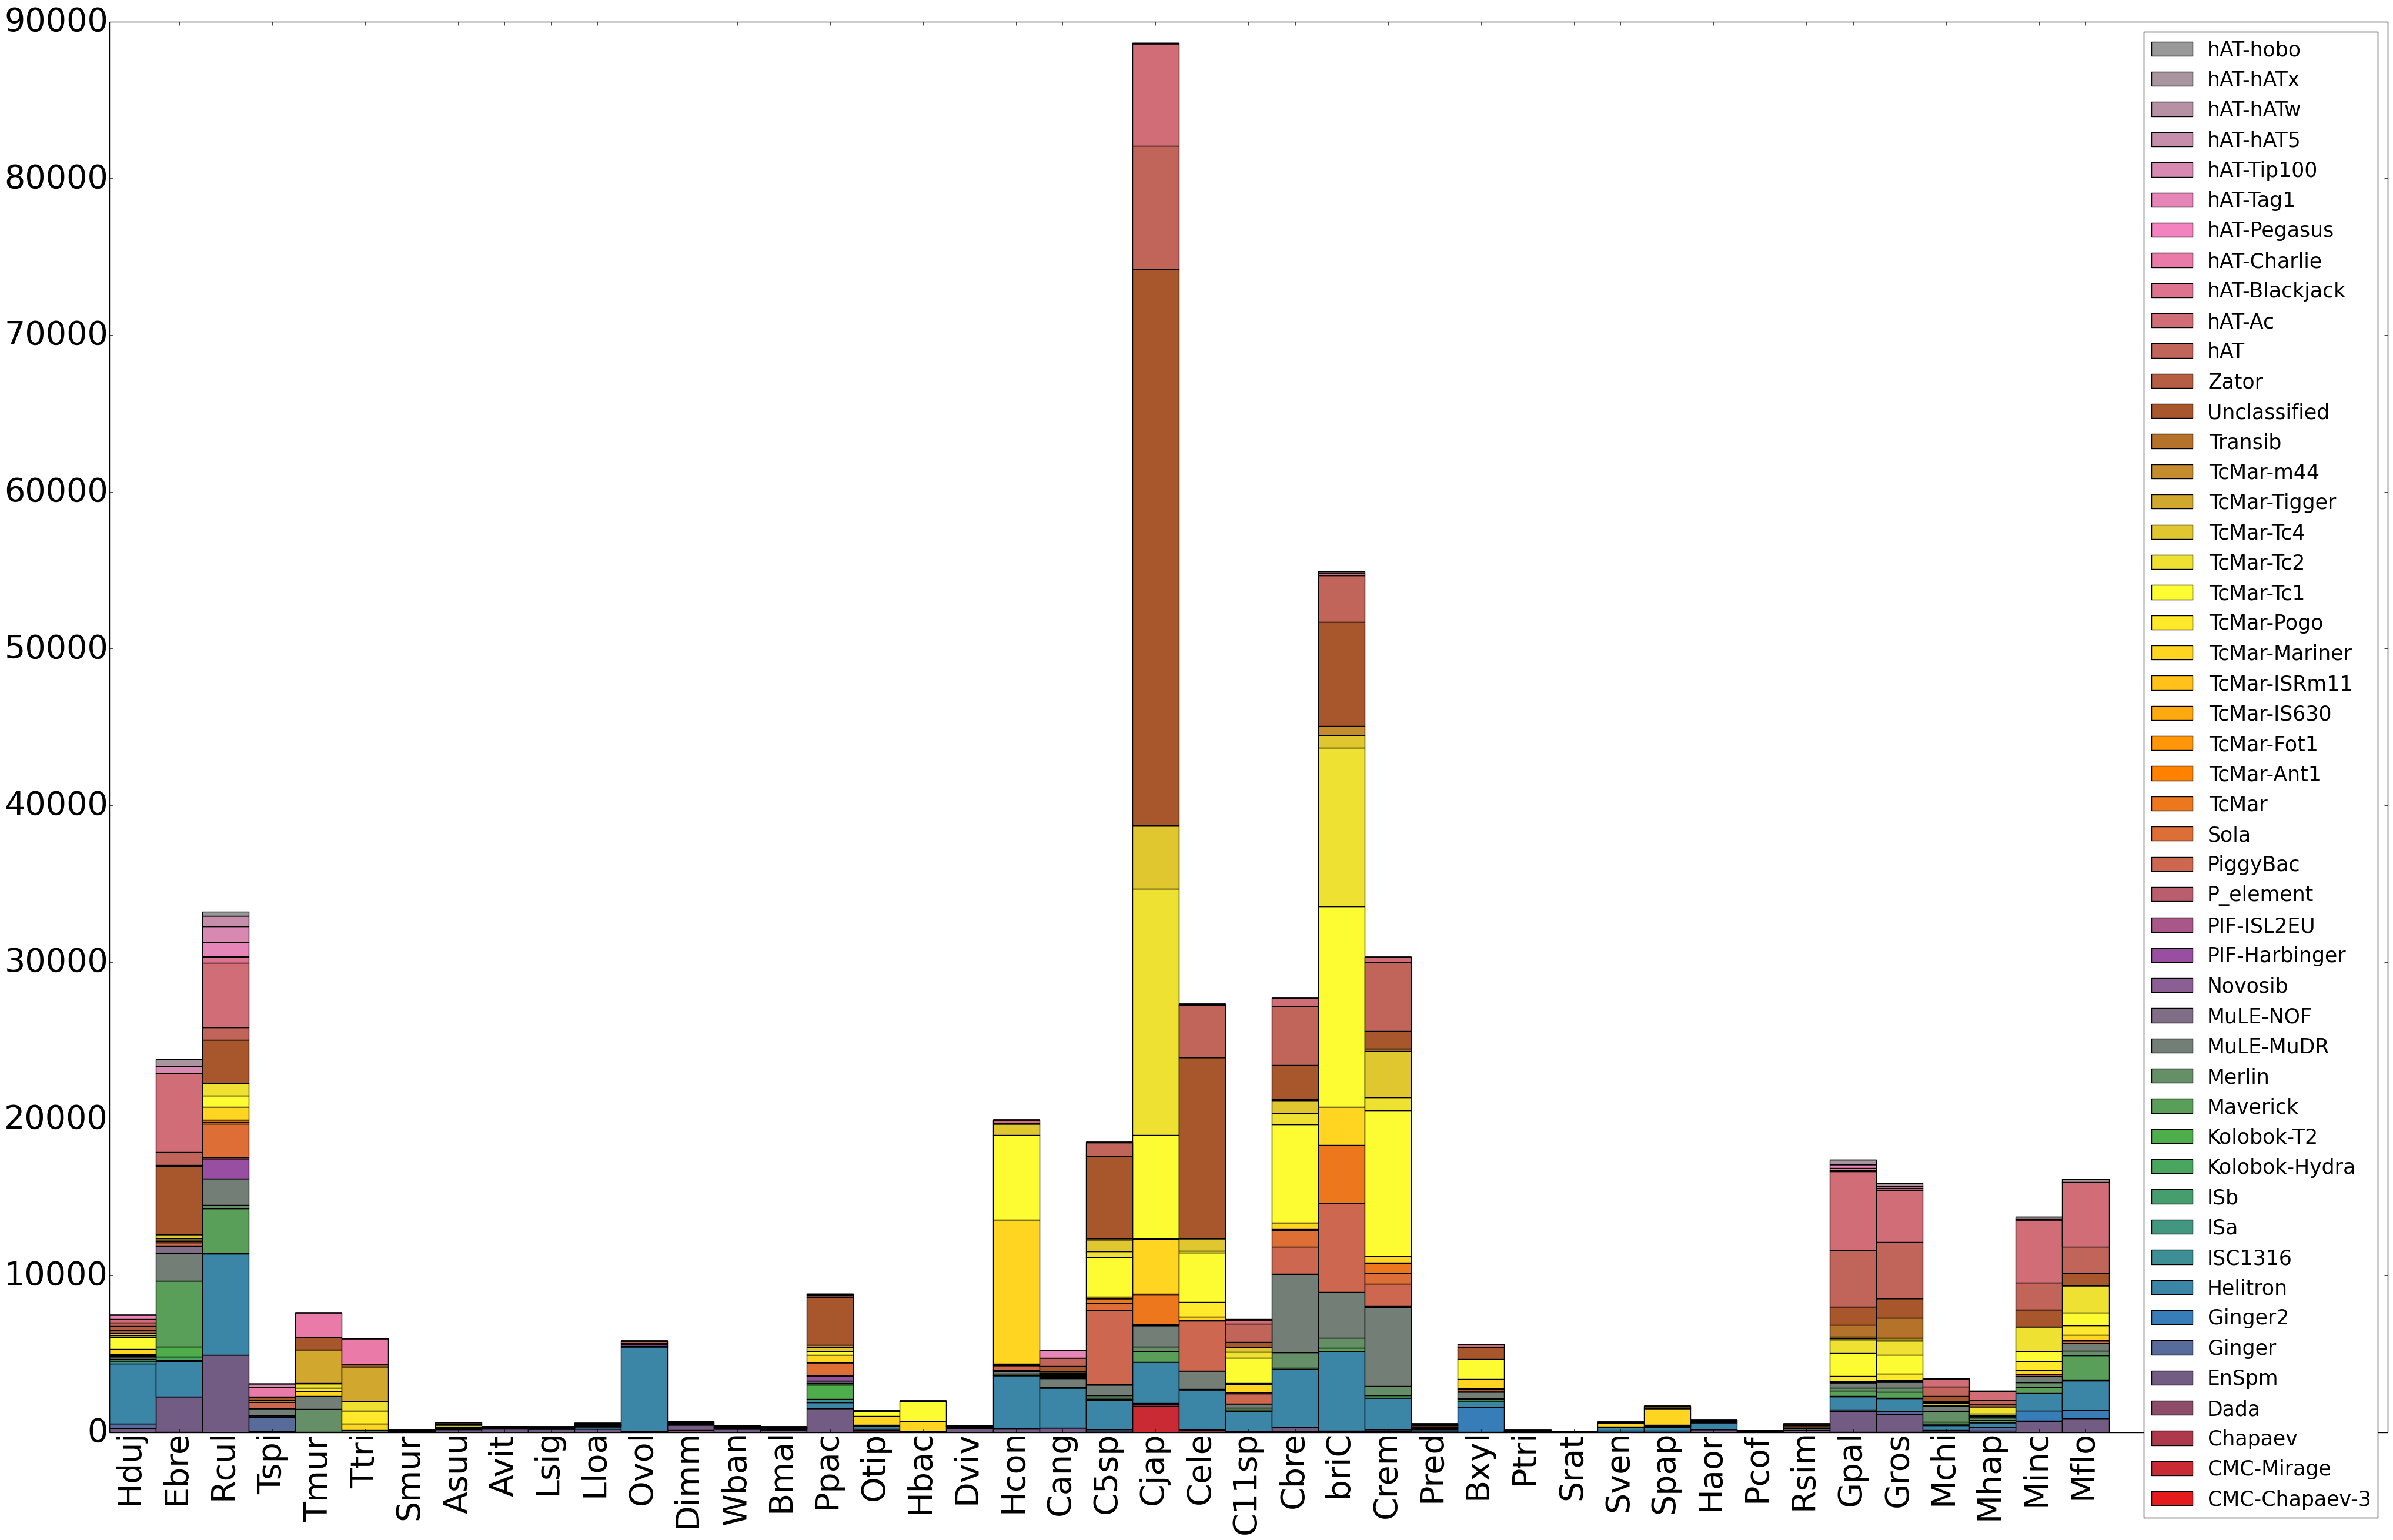

In [43]:
from IPython.display import Image
Image('TE_counts/bar_chart_dna_families_s_figure_no_wtsi.png')